In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

%load_ext autoreload
%autoreload 2

## Test and Training data

In [26]:
# Generate data like a sine wave data
Fs = 2000
f = 5
x = np.arange(100000)
data = np.sin(2 * np.pi * f * x / Fs)
data = pd.DataFrame(data, columns=['price'])
data['price'] = (data['price'] * 100) + 100

# Add column for last direction and last price to use as basic features
data['last_direction'] = np.where(data.shift(1)['price'] > data['price'], -1, 1)
data['last_price'] = data['price'].shift()
data = data.dropna()
train_data = data.iloc[:66666, :].copy()
test_data = data.iloc[66666:, :].copy()

# Add column to predict in training data: next_direction
train_data['next_direction'] = np.where(train_data.shift(-1)['price'] > train_data['price'], 1, -1)

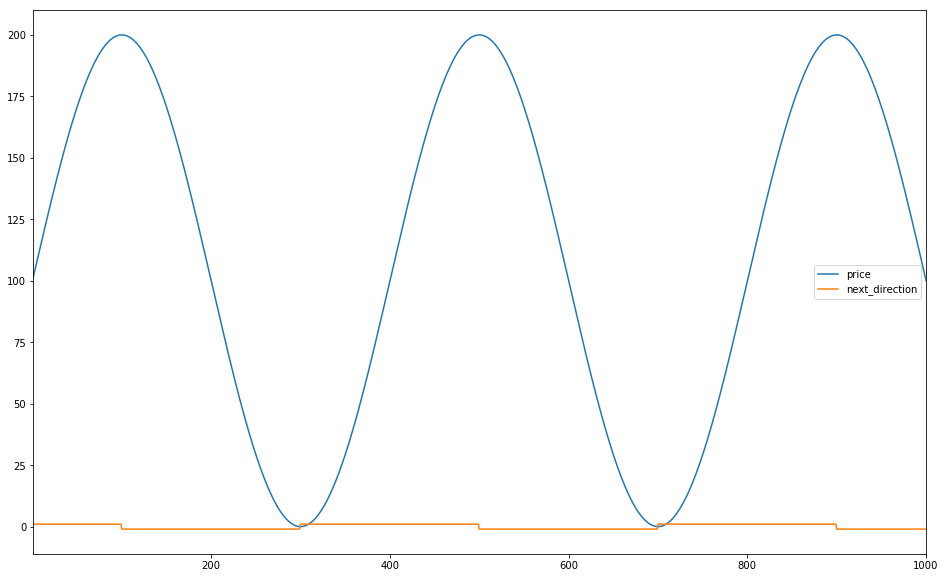

In [27]:
train_data[['price', 'next_direction']].iloc[:1000].plot(figsize=(16, 10))

In [28]:
train_data.tail(15)

,price,last_direction,last_price,next_direction
66652,27.103137,-1,28.187370,-1
66653,26.036891,-1,27.103137,-1
66654,24.988893,-1,26.036891,-1
66655,23.959403,-1,24.988893,-1
66656,22.948676,-1,23.959403,-1
66657,21.956959,-1,22.948676,-1
66658,20.984499,-1,21.956959,-1
66659,20.031534,-1,20.984499,-1
66660,19.098301,-1,20.031534,-1
66661,18.185028,-1,19.098301,-1


## The model

In [29]:
model = RandomForestClassifier(n_jobs=-1, n_estimators=65)
# Fit the model
X_train = train_data[['price', 'last_price', 'last_direction']]
y_train = train_data['next_direction']
model.fit(X_train, y_train.values.ravel());

## Test the model

In [30]:
# Add predictions to dataframe
test_data['next_prediction'] = model.predict(test_data[['price', 'last_price', 'last_direction']])

In [31]:
test_data[['price', 'next_prediction']].tail(5)

,price,next_prediction
99995,92.154090,1
99996,93.720948,1
99997,95.289355,1
99998,96.858924,1
99999,98.429268,1


In [32]:
test_data['next_prediction'].value_counts()

 1    16700
-1    16633
Name: next_prediction, dtype: int64

In [33]:
# add columns for price direction and predicted direction
test_data['next_direction'] = np.where(test_data['price'] > test_data['price'].shift(-1), -1, 1)
test_data['correct'] = test_data['next_prediction'] == test_data['next_direction']

In [34]:
# How often does the model predict the correct price change direction
test_data['correct'].value_counts()

True    33333
Name: correct, dtype: int64